In [1]:
#IMPORTING LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

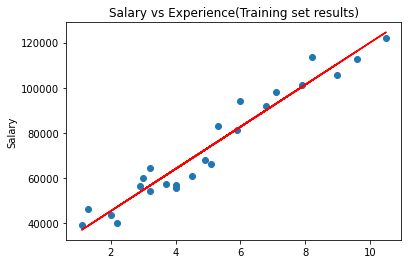

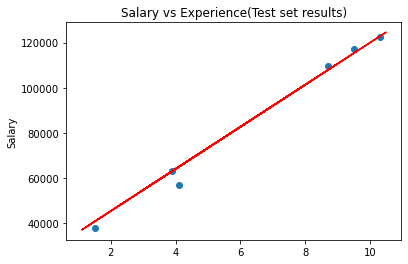

In [2]:
dataset = pd.read_csv("Data.csv.csv")

#important to note that in importing files file exenstions should be included
X= dataset.iloc[:,:-1].values
Y=dataset.iloc[:,3].values

dataset.describe()

#Transformers for missing value imputation
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(missing_values=np.nan,strategy='mean')
#since we don't want to transform the index,first wcolumn

imputer=imputer.fit(X[:,1:3]) 

#replace missing values woth mean

X[:,1:3] = imputer.transform(X[:,1:3])


#Encoding Categorical Data]
#
#
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[('one_hot_encoder',OneHotEncoder(categories='auto'),[0])],remainder='passthrough')
##next fitting our data to the object

X=np.array(ct.fit_transform(X),dtype=np.float)

##encode the dependent variables usually two
#from sklearn.preprocessing import LabelEncoder
#le =LabelEncoder()
#Y=le.fit_transform(Y)


#Splitting into train and test set
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(
#        X,y, test_size=0.20, random state=0)


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#
##feature_scaling
#from sklearn.preprocessing import StandardScaler
#sc_X=StandardScaler()
#
#X_train=sc_X.fit_transform(X_train)
#
#X_test=sc_X.fit_transform(X_test)



dataset1 = pd.read_csv("Salaries.csv.csv")


X= dataset1.iloc[:,0].values
Y=dataset1.iloc[:,1].values

#dataset1.describe()

#Transformers for missing value imputation


#Encoding Categorical Data]
#
#
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer
#
#ct = ColumnTransformer(transformers=[('one_hot_encoder',OneHotEncoder(categories='auto'),[0])],remainder='passthrough')
##next fitting our data to the object
#
#X=np.array(ct.fit_transform(X),dtype=np.float)

##encode the dependent variables usually two
#from sklearn.preprocessing import LabelEncoder
#le =LabelEncoder()
#Y=le.fit_transform(Y)


#Splitting into train and test set
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(
#        X,y, test_size=0.20, random state=0)


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
X_train= X_train.reshape(-1,1)
y_train= y_train.reshape(-1,1)
regressor.fit(X_train,y_train) 

#to reshape your data

#predicting the results
X_test = X_test.reshape(-1,1)

y_pred = regressor.predict(X_test)

#Visualization
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),color='red')
plt.title('Salary vs Experience(Training set results)')
plt.ylabel('Salary')
plt.show()

#vissualization
plt.scatter(X_test,y_test)
plt.plot(X_train,regressor.predict(X_train),color='red')
plt.title('Salary vs Experience(Test set results)')
plt.ylabel('Salary')
plt.show()

In [9]:
#classificationn decison tree

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing dataset
dataset = pd.read_csv("Customer List.csv.csv")
X = dataset.iloc[:,[2,3]].values
Y = dataset.iloc[:, 4].values


# Split dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)



from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,Y_train)


y_pred=classifier.predict(X_test)


#build confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(Y_test,y_pred)

#Random Forrest Classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing dataset
dataset = pd.read_csv("Customer List.csv.csv")
X = dataset.iloc[:,[2,3]].values
Y = dataset.iloc[:, 4].values


# Split dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)



from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(X_train,Y_train)


y_pred=classifier.predict(X_test)


#build confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(Y_test,y_pred)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


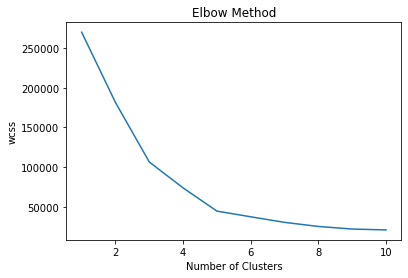

In [10]:

#K Means Cluster Analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset=pd.read_csv('Shopping_center.csv.csv')


X=dataset.iloc[:,[3,4]].values

#Elbow method
from sklearn.cluster import KMeans
wcss=[]

#using 10 clusters
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++', n_init=10,max_iter=300,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

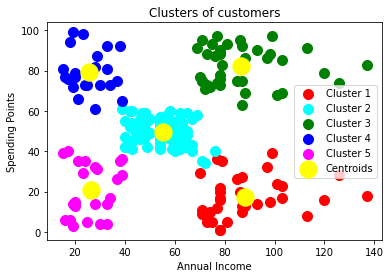

In [11]:
#1fitting k_means to datasr=et
kmeans=KMeans(n_clusters=5,init='k-means++', n_init=10,max_iter=300,random_state=0)
Y_kmeans=kmeans.fit_predict(X)

plt.scatter(X[Y_kmeans==0,0],X[Y_kmeans==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X[Y_kmeans==1,0],X[Y_kmeans==1,1],s=100,c='cyan',label='Cluster 2')
plt.scatter(X[Y_kmeans==2,0],X[Y_kmeans==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(X[Y_kmeans==3,0],X[Y_kmeans==3,1],s=100,c='blue',label='Cluster 4')
plt.scatter(X[Y_kmeans==4,0],X[Y_kmeans==4,1],s=100,c='magenta',label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label ='Centroids')



plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Points')
plt.legend()
plt.show()


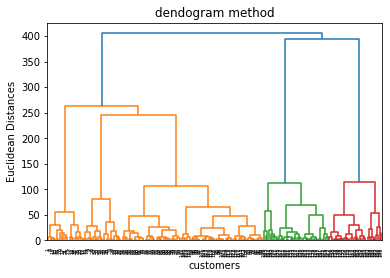

In [12]:
# Hierrarchical Cluster Analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#doingn data preprocessing
dataset=pd.read_csv('Shopping_center.csv.csv')


X=dataset.iloc[:,[3,4]].values

#using dendrogram method

import scipy.cluster.hierarchy as sch
d_gram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('dendogram method')
plt.xlabel('customers')
plt.ylabel('Euclidean Distances')
plt.savefig('fig_1.png',dpi=500)
plt.show()



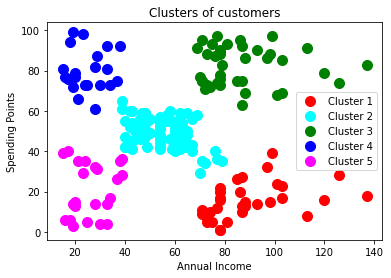

<Figure size 432x288 with 0 Axes>

In [13]:

#fitting the HCA to dataset

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
Y_hc = hc.fit_predict(X)


plt.scatter(X[Y_hc==0,0],X[Y_hc==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X[Y_hc==1,0],X[Y_hc==1,1],s=100,c='cyan',label='Cluster 2')
plt.scatter(X[Y_hc==2,0],X[Y_hc==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(X[Y_hc==3,0],X[Y_hc==3,1],s=100,c='blue',label='Cluster 4')
plt.scatter(X[Y_hc==4,0],X[Y_hc==4,1],s=100,c='magenta',label='Cluster 5')


plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Points')
plt.legend()
plt.show()
plt.savefig('Hierachial_Cluster.png',dpi=500)
